In [75]:
from datetime import datetime, timedelta
from pathlib import Path

import janitor
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as gg
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(rc={"figure.figsize": (10, 6)})

In [2]:
data_dir = Path("data", "dataframes")
nws_df_path = data_dir / "national-weather-service.pkl"

In [3]:
nws_df = pd.read_pickle(nws_df_path)
nws_df.head()

,detailedForecast,shortForecast,startTime,endTime,icon,isDaytime,name,number,temperature,temperatureUnit,temperatureTrend,windDirection,windSpeed,forecast_type
0,"A slight chance of rain between 9am and 10am, ...",Rain,2021-03-28 06:00:00-04:00,2021-03-28 18:00:00-04:00,"https://api.weather.gov/icons/land/day/rain,80...",True,Today,1,58.0,F,falling,SE,6 to 12 mph,daily
1,Rain and a chance of thunderstorms and patchy ...,Light Rain,2021-03-28 18:00:00-04:00,2021-03-29 06:00:00-04:00,"https://api.weather.gov/icons/land/night/tsra,...",False,Tonight,2,39.0,F,rising,SW,9 to 15 mph,daily
2,"Sunny. High near 50, with temperatures falling...",Sunny,2021-03-29 06:00:00-04:00,2021-03-29 18:00:00-04:00,https://api.weather.gov/icons/land/day/few?siz...,True,Monday,3,50.0,F,falling,W,15 to 20 mph,daily
3,"Clear, with a low around 27. West wind 1 to 14...",Clear,2021-03-29 18:00:00-04:00,2021-03-30 06:00:00-04:00,https://api.weather.gov/icons/land/night/skc?s...,False,Monday Night,4,27.0,F,None,W,1 to 14 mph,daily
4,"Sunny. High near 57, with temperatures falling...",Sunny,2021-03-30 06:00:00-04:00,2021-03-30 18:00:00-04:00,https://api.weather.gov/icons/land/day/skc?siz...,True,Tuesday,5,57.0,F,falling,SW,1 to 13 mph,daily


<ipython-input-4-ac8bc38866fc>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates)


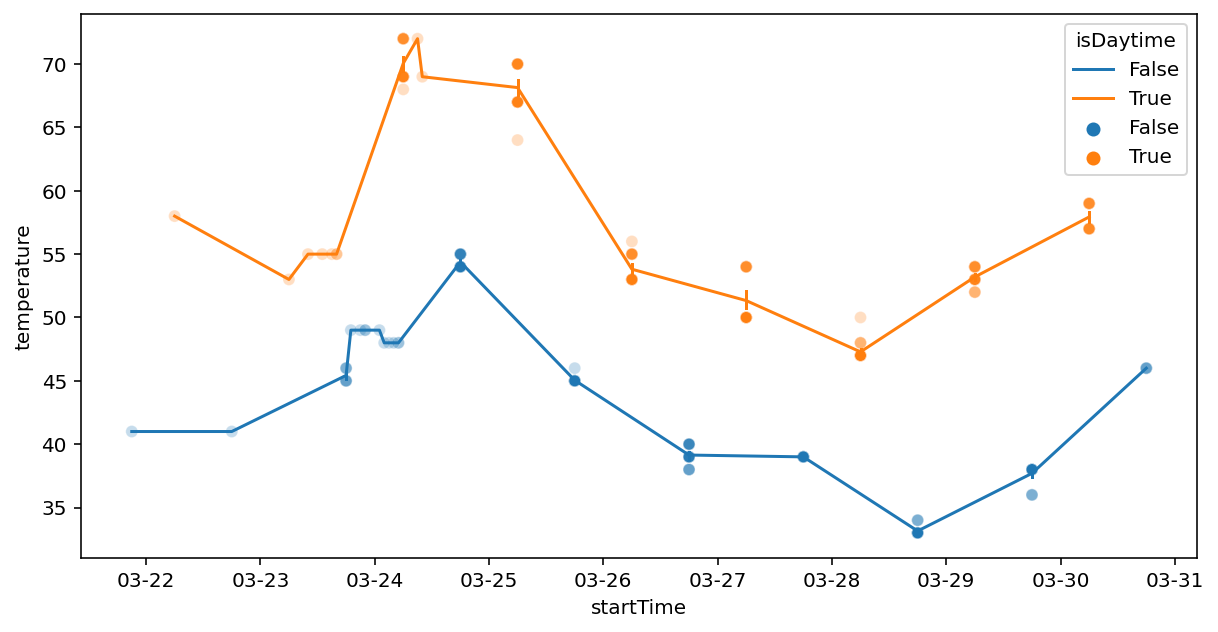

In [4]:
d = nws_df.copy()[nws_df["forecast_type"] == "daily"]
d["date"] = [st.date() for st in d["startTime"]]

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    x="startTime",
    y="temperature",
    data=d,
    hue="isDaytime",
    ax=ax,
    err_style="bars",
    ci=89,
)
sns.scatterplot(
    x="startTime", y="temperature", data=d, hue="isDaytime", ax=ax, alpha=0.25
)
x_dates = d["startTime"].dt.strftime("%m-%d").sort_values().unique()
ax.set_xticklabels(labels=x_dates)

plt.show()

<ipython-input-5-c24b4c59afe6>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_dates)


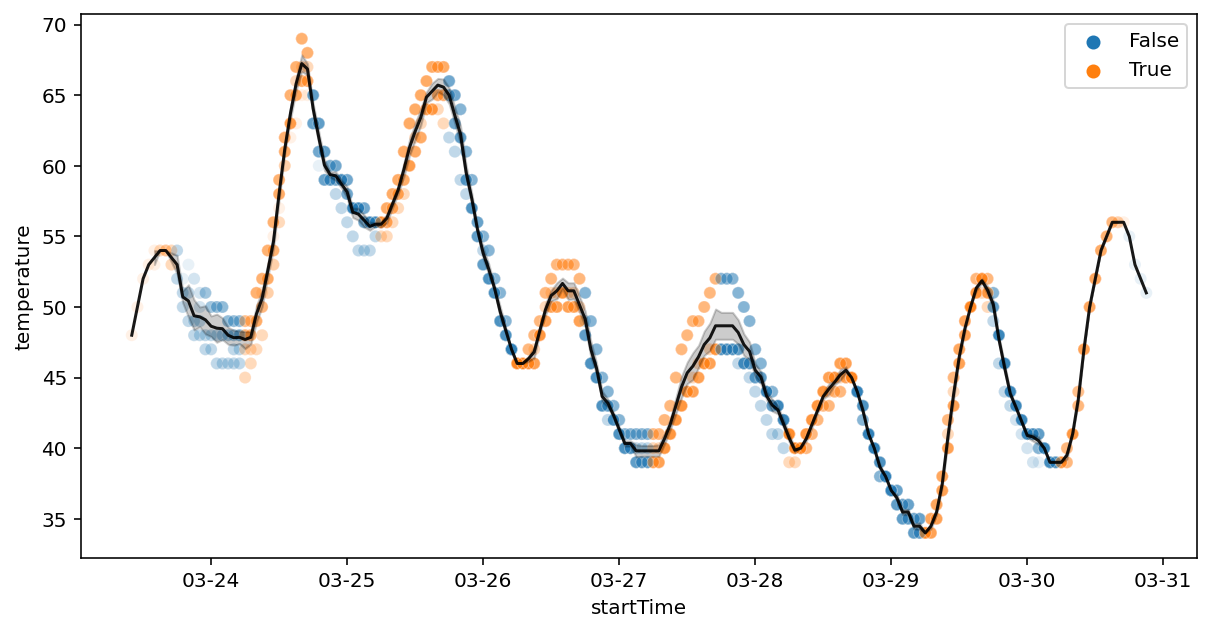

In [5]:
d = nws_df.copy()[nws_df["forecast_type"] == "hourly"]

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    x="startTime", y="temperature", data=d, hue="isDaytime", ax=ax, alpha=0.1
)
sns.lineplot(x="startTime", y="temperature", data=d, ax=ax, ci=95, color="k", alpha=0.9)
x_dates = d["startTime"].dt.strftime("%m-%d").sort_values().unique()
ax.set_xticklabels(labels=x_dates)

plt.show()

In [6]:
nws_df["name"].unique()

array(['Today', 'Tonight', 'Friday', 'Friday Night', 'Saturday',
       'Saturday Night', 'Sunday', 'Sunday Night', 'Monday',
       'Monday Night', 'Tuesday', 'Tuesday Night', 'Wednesday',
       'Wednesday Night', 'Thursday', 'Thursday Night', 'This Afternoon',
       'Overnight', ''], dtype=object)

## ClimaCell

In [59]:
data_dir = Path("data", "dataframes")
cc_df_path = data_dir / "climacell.pkl"

cc_df = pd.read_pickle(cc_df_path).clean_names()
cc_df.head()

,temperature,temperatureapparent,precipitationintensity,precipitationprobability,precipitationtype,visibility,cloudcover,weathercode,humidity,windspeed,starttime,forecast_type,collection_timestamp,city
0,7.68,7.68,0.0,0.0,1.0,11.44,0.0,1000,43.85,1.63,2021-03-28 13:22:00+00:00,current,2021-03-28 13:22:37.915828,tuscon
0,7.68,7.68,0.0,0.0,1.0,11.44,0.0,1000,43.85,1.63,2021-03-28 13:22:00+00:00,hourly,2021-03-28 13:22:37.915828,tuscon
0,10.24,10.24,0.0,0.0,1.0,16.00,0.0,1000,35.44,2.33,2021-03-28 14:22:00+00:00,hourly,2021-03-28 13:22:37.915828,tuscon
0,16.50,16.50,0.0,0.0,1.0,16.00,0.0,1000,22.77,3.18,2021-03-28 15:22:00+00:00,hourly,2021-03-28 13:22:37.915828,tuscon
0,20.46,20.46,0.0,0.0,1.0,16.00,0.0,1000,17.07,4.59,2021-03-28 16:22:00+00:00,hourly,2021-03-28 13:22:37.915828,tuscon


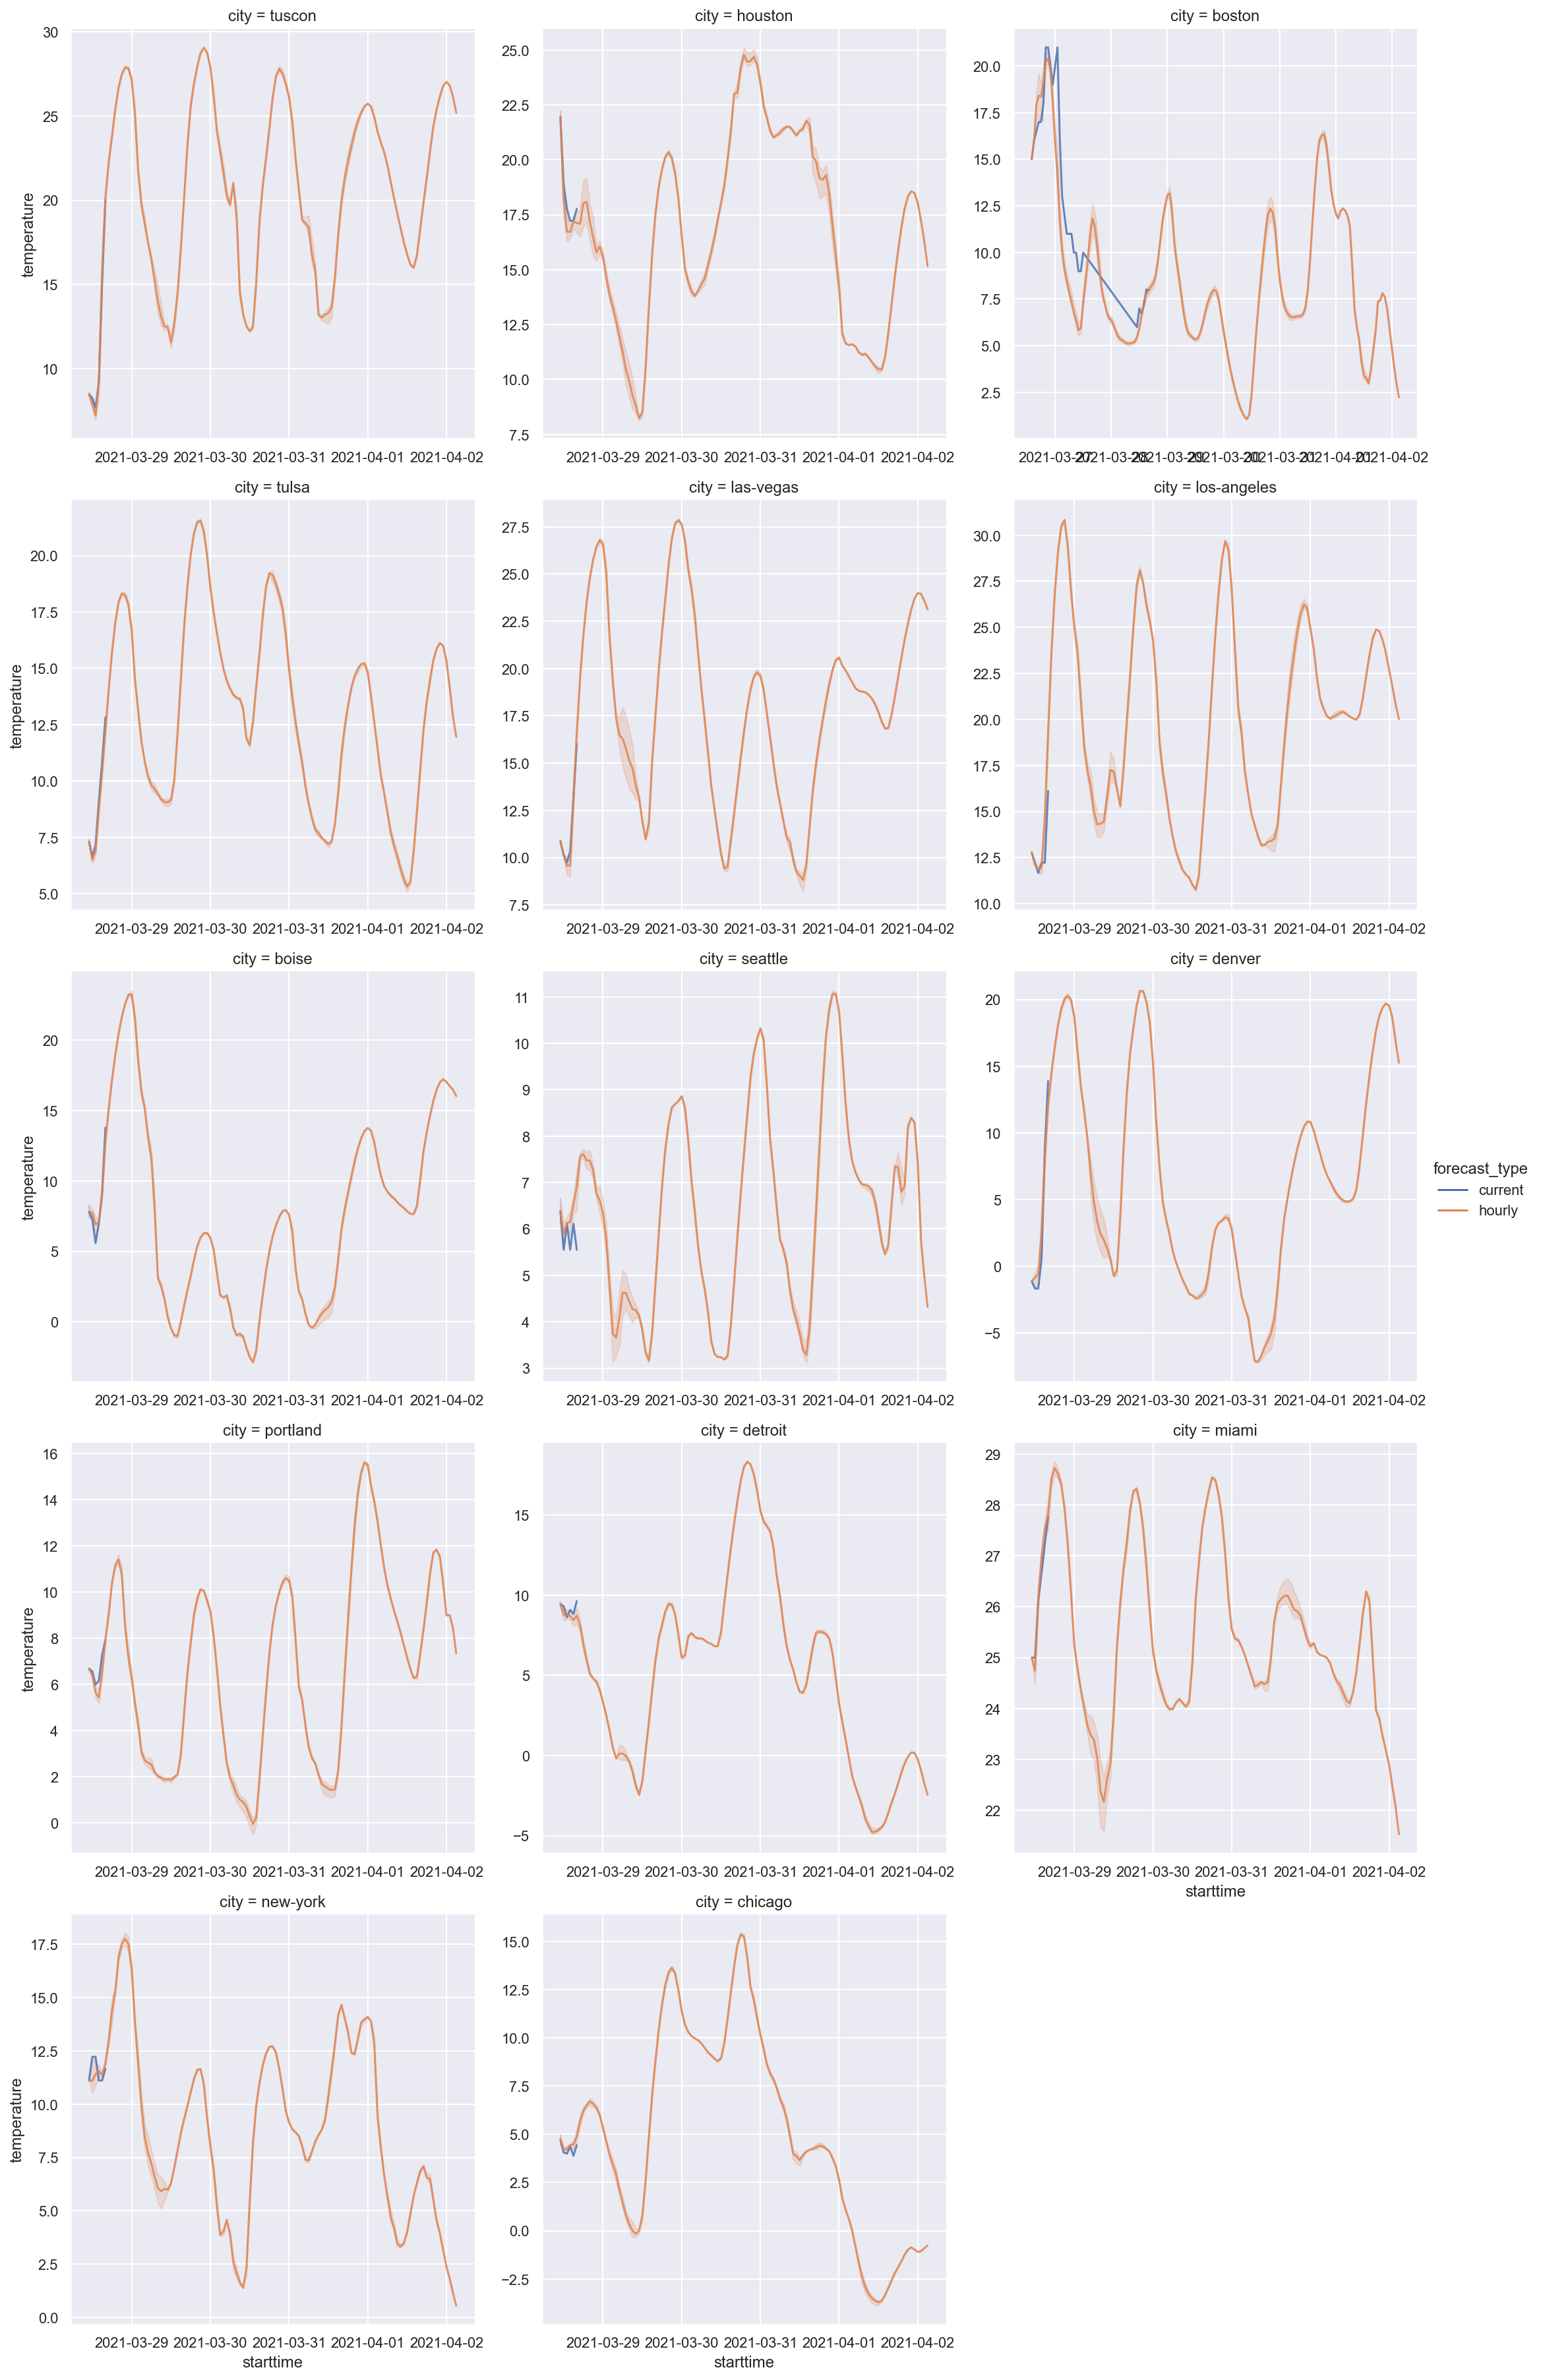

In [73]:
def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return t.replace(second=0, microsecond=0, minute=0, hour=t.hour) + timedelta(
        hours=t.minute // 30
    )


sns.relplot(
    x="starttime",
    y="temperature",
    data=cc_df[cc_df.forecast_type != "daily"].assign(
        starttime=lambda d: [hour_rounder(t) for t in d.starttime]
    ),
    hue="forecast_type",
    alpha=0.85,
    col="city",
    col_wrap=3,
    kind="line",
    facet_kws={"sharex": False, "sharey": False},
)

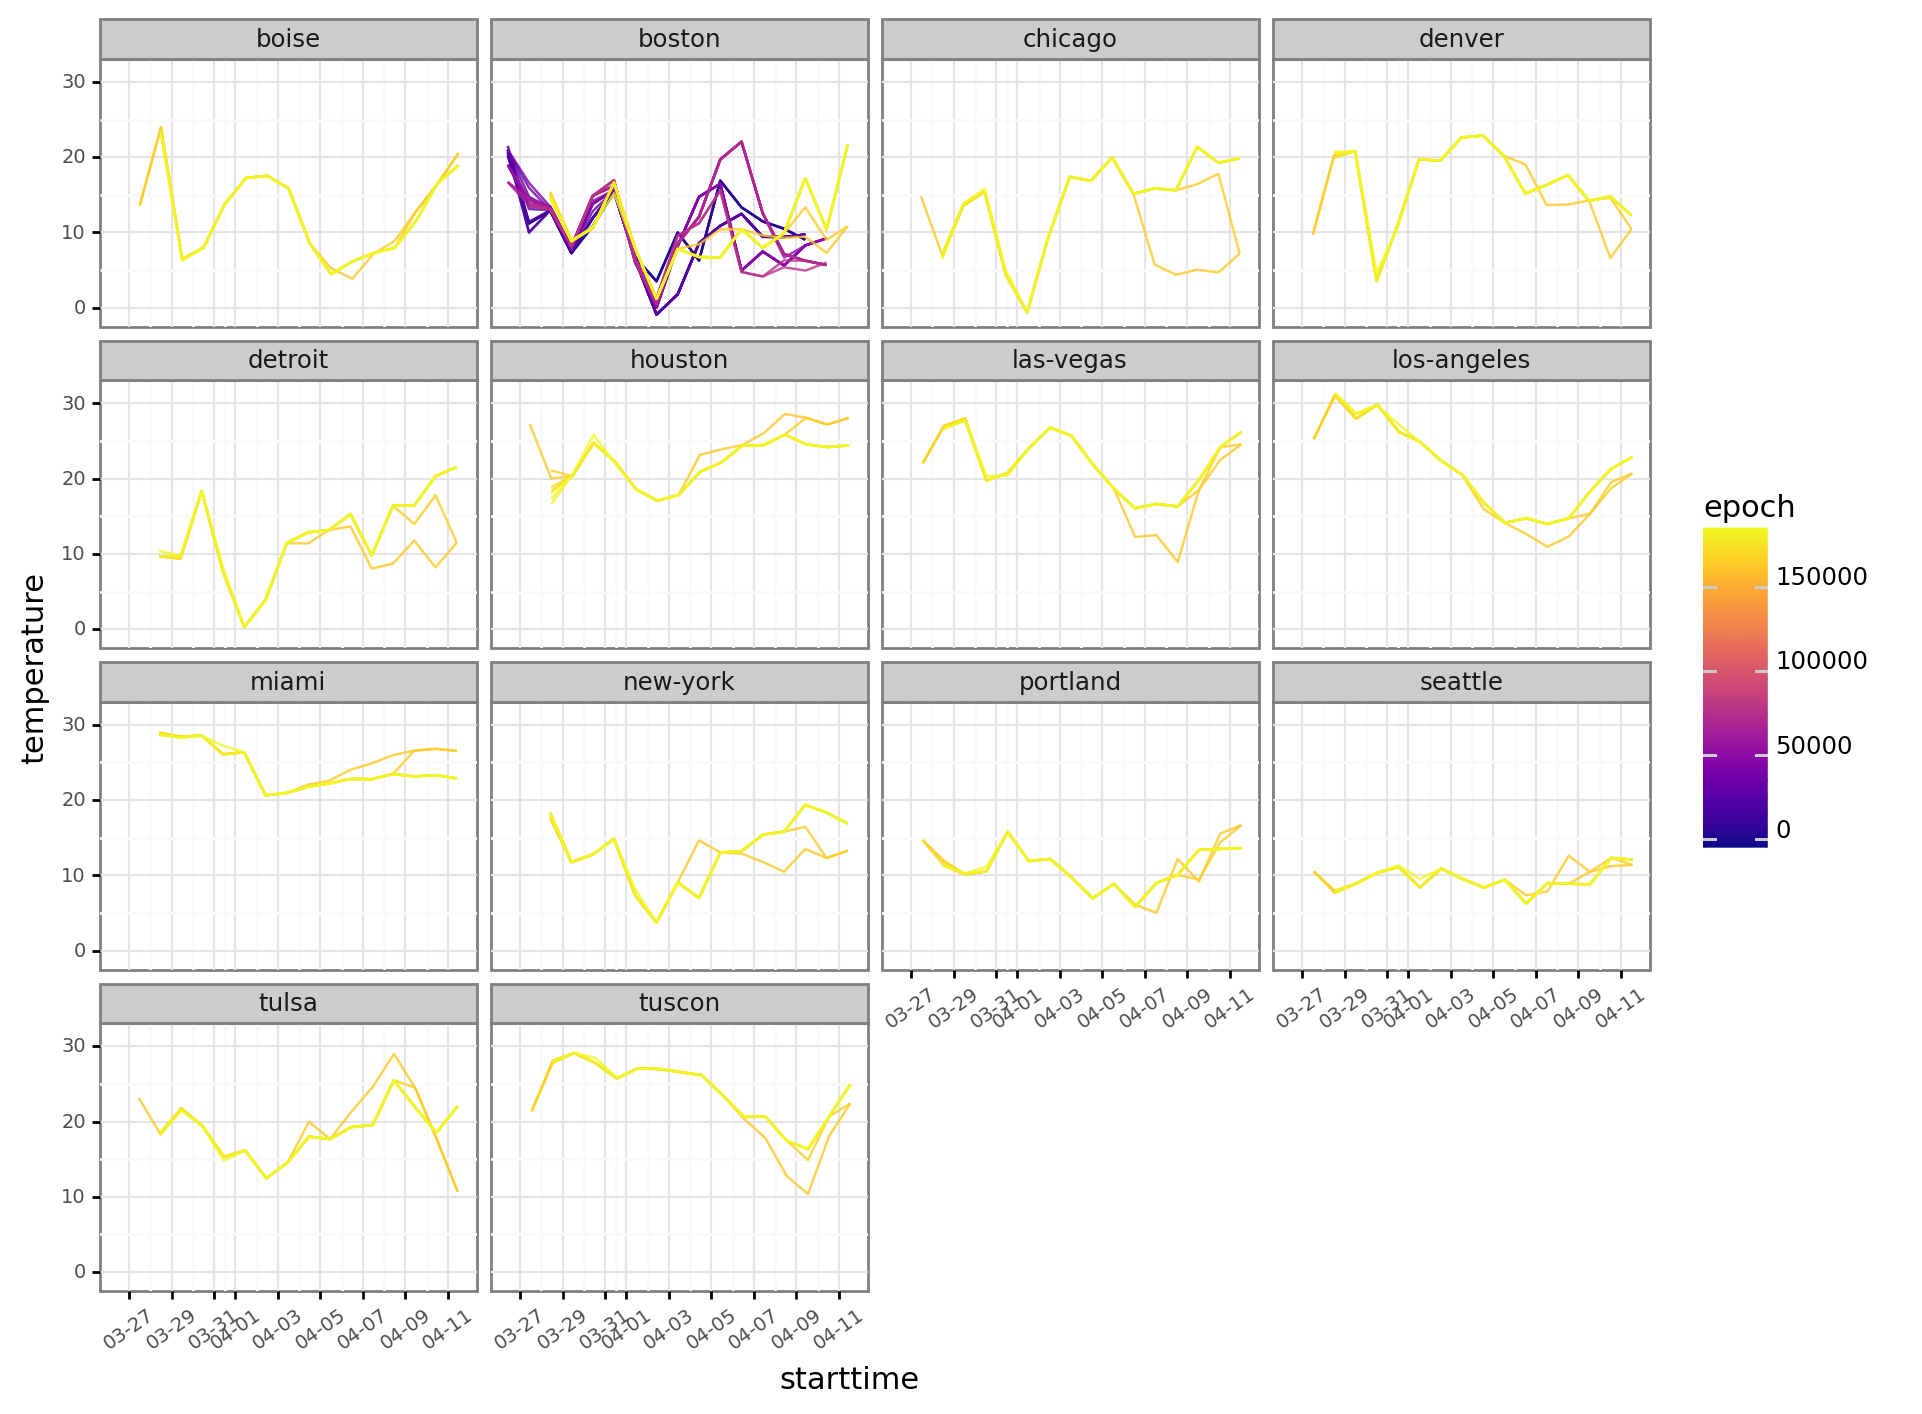

<ggplot: (330466606)>

In [113]:
d = cc_df.copy()[cc_df.forecast_type == "daily"]
d["epoch"] = (
    d["collection_timestamp"] - min(d["collection_timestamp"])
).dt.total_seconds()

(
    gg.ggplot(d, gg.aes(x="starttime", y="temperature"))
    + gg.facet_wrap("~ city", ncol=4)
    + gg.geom_line(gg.aes(color="epoch", group="factor(epoch)"), alpha=0.8)
    + gg.scale_x_datetime(date_labels="%m-%d")
    + gg.scale_color_continuous("plasma")
    + gg.theme_bw()
    + gg.theme(
        figure_size=(10, 8),
        axis_text_x=gg.element_text(angle=35, size=7),
        axis_text_y=gg.element_text(size=7),
    )
)